In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Import file

In [8]:
pd.options.display.float_format = '{:.2f}'.format
nba = pd.read_csv('nba_stats_merged.csv', encoding='utf-8')
nba

,PLAYER,AVG SALARY,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK
0,Stephen Curry,21410995.23,28.00,63.54,41.92,21.61,2181.69,1543.38,528.85,1116.92,...,245.92,270.77,90.84,42.54,252.69,295.23,414.46,199.85,105.15,14.38
1,James Harden,22771817.00,26.00,72.46,47.08,25.39,2509.08,1805.92,532.31,1203.92,...,541.85,630.38,85.61,57.08,350.15,407.23,492.08,272.23,111.46,39.38
2,John Wall,20659679.75,24.60,61.30,28.30,33.00,2183.20,1170.20,423.50,983.30,...,261.40,335.50,77.13,34.70,226.50,261.20,555.70,233.20,101.80,42.70
3,Russell Westbrook,22775948.79,26.50,72.93,42.71,30.21,2530.29,1664.14,594.43,1357.50,...,393.71,502.71,77.55,120.71,417.93,538.64,615.07,299.14,121.36,22.36
4,Kevin Durant,23162299.73,25.64,67.07,41.93,25.14,2464.93,1823.29,622.57,1255.50,...,451.71,510.93,88.19,47.07,427.64,474.71,288.00,211.71,72.93,74.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,Jerome Kersey,1230830.40,37.00,49.20,33.60,15.60,947.80,249.60,107.40,261.00,...,30.60,50.80,56.76,55.20,124.40,179.60,51.60,39.40,57.80,26.40
954,Todd Fuller,1666712.60,24.00,45.00,19.80,25.20,499.60,166.20,63.00,150.00,...,40.20,60.20,71.66,48.00,86.80,134.80,9.20,29.20,6.80,12.00
955,Scott Burrell,1966663.75,28.00,49.40,25.40,24.00,824.00,278.40,101.00,257.80,...,35.60,47.20,66.48,45.40,101.40,146.80,51.40,32.80,40.40,22.20
956,Chucky Brown,894728.75,31.50,50.33,26.33,24.00,780.17,242.50,102.17,224.83,...,34.83,50.67,65.20,31.17,95.17,126.33,37.17,27.67,13.17,13.83


In [18]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PLAYER      958 non-null    object 
 1   AVG SALARY  958 non-null    float64
 2   AGE         958 non-null    float64
 3   GP          958 non-null    float64
 4   W           958 non-null    float64
 5   L           958 non-null    float64
 6   MIN         958 non-null    float64
 7   PTS         958 non-null    float64
 8   FGM         958 non-null    float64
 9   FGA         958 non-null    float64
 10  FG%         958 non-null    float64
 11  3PM         958 non-null    float64
 12  3PA         958 non-null    float64
 13  3P%         958 non-null    float64
 14  FTM         958 non-null    float64
 15  FTA         958 non-null    float64
 16  FT%         958 non-null    float64
 17  OREB        958 non-null    float64
 18  DREB        958 non-null    float64
 19  REB         958 non-null    f

In [13]:
# Drop columns we do not want to include as variables, assign to new variable
nba2 = nba.drop(columns=(['GP', 'W', 'L', 'FGM', 'FGA', '3PA', '3PM', 'FTM', 'FTA', 'OREB', 'DREB']), axis=1)
nba2

,PLAYER,AVG SALARY,AGE,MIN,PTS,FG%,3P%,FT%,REB,AST,TOV,STL,BLK
0,Stephen Curry,21410995.23,28.00,2181.69,1543.38,46.93,41.73,90.84,295.23,414.46,199.85,105.15,14.38
1,James Harden,22771817.00,26.00,2509.08,1805.92,44.26,36.24,85.61,407.23,492.08,272.23,111.46,39.38
2,John Wall,20659679.75,24.60,2183.20,1170.20,42.94,29.53,77.13,261.20,555.70,233.20,101.80,42.70
3,Russell Westbrook,22775948.79,26.50,2530.29,1664.14,43.76,29.83,77.55,538.64,615.07,299.14,121.36,22.36
4,Kevin Durant,23162299.73,25.64,2464.93,1823.29,49.98,38.49,88.19,474.71,288.00,211.71,72.93,74.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,Jerome Kersey,1230830.40,37.00,947.80,249.60,41.28,11.52,56.76,179.60,51.60,39.40,57.80,26.40
954,Todd Fuller,1666712.60,24.00,499.60,166.20,40.00,0.00,71.66,134.80,9.20,29.20,6.80,12.00
955,Scott Burrell,1966663.75,28.00,824.00,278.40,40.20,35.64,66.48,146.80,51.40,32.80,40.40,22.20
956,Chucky Brown,894728.75,31.50,780.17,242.50,44.22,16.53,65.20,126.33,37.17,27.67,13.17,13.83


We will drop 'field goals made (FGM)' and 'field goals attempted (FGA)' and keep 'field goal percentage (FG%)' instead because FG% is the ratio of FGM to FGA.

We will do the same and drop '3 point field goals made (3PM)' and '3 point field goals attempted (3PA)' and keep '3 point field goals percentage (3P%)' for the equivalent reason as above.

We will do the same and drop 'free throws made (FTM)' and 'free throws attempted (FTA)' and keep 'free throw percentage (FT%)' for the equivalent reason as above.

We will drop 'offensive rebounds (OREB)' and 'defensive rebounds (DREB)' and keep 'rebounds (REB)' instead, as REB is the sum of both OREBB and DREB.

We will drop 'games played (GP)', 'wins (W)', 'losses (L)' and keep 'minutes played (MIN)' instead, since total minutes played on the court is a better, more accurate representation of how much a player is playing.



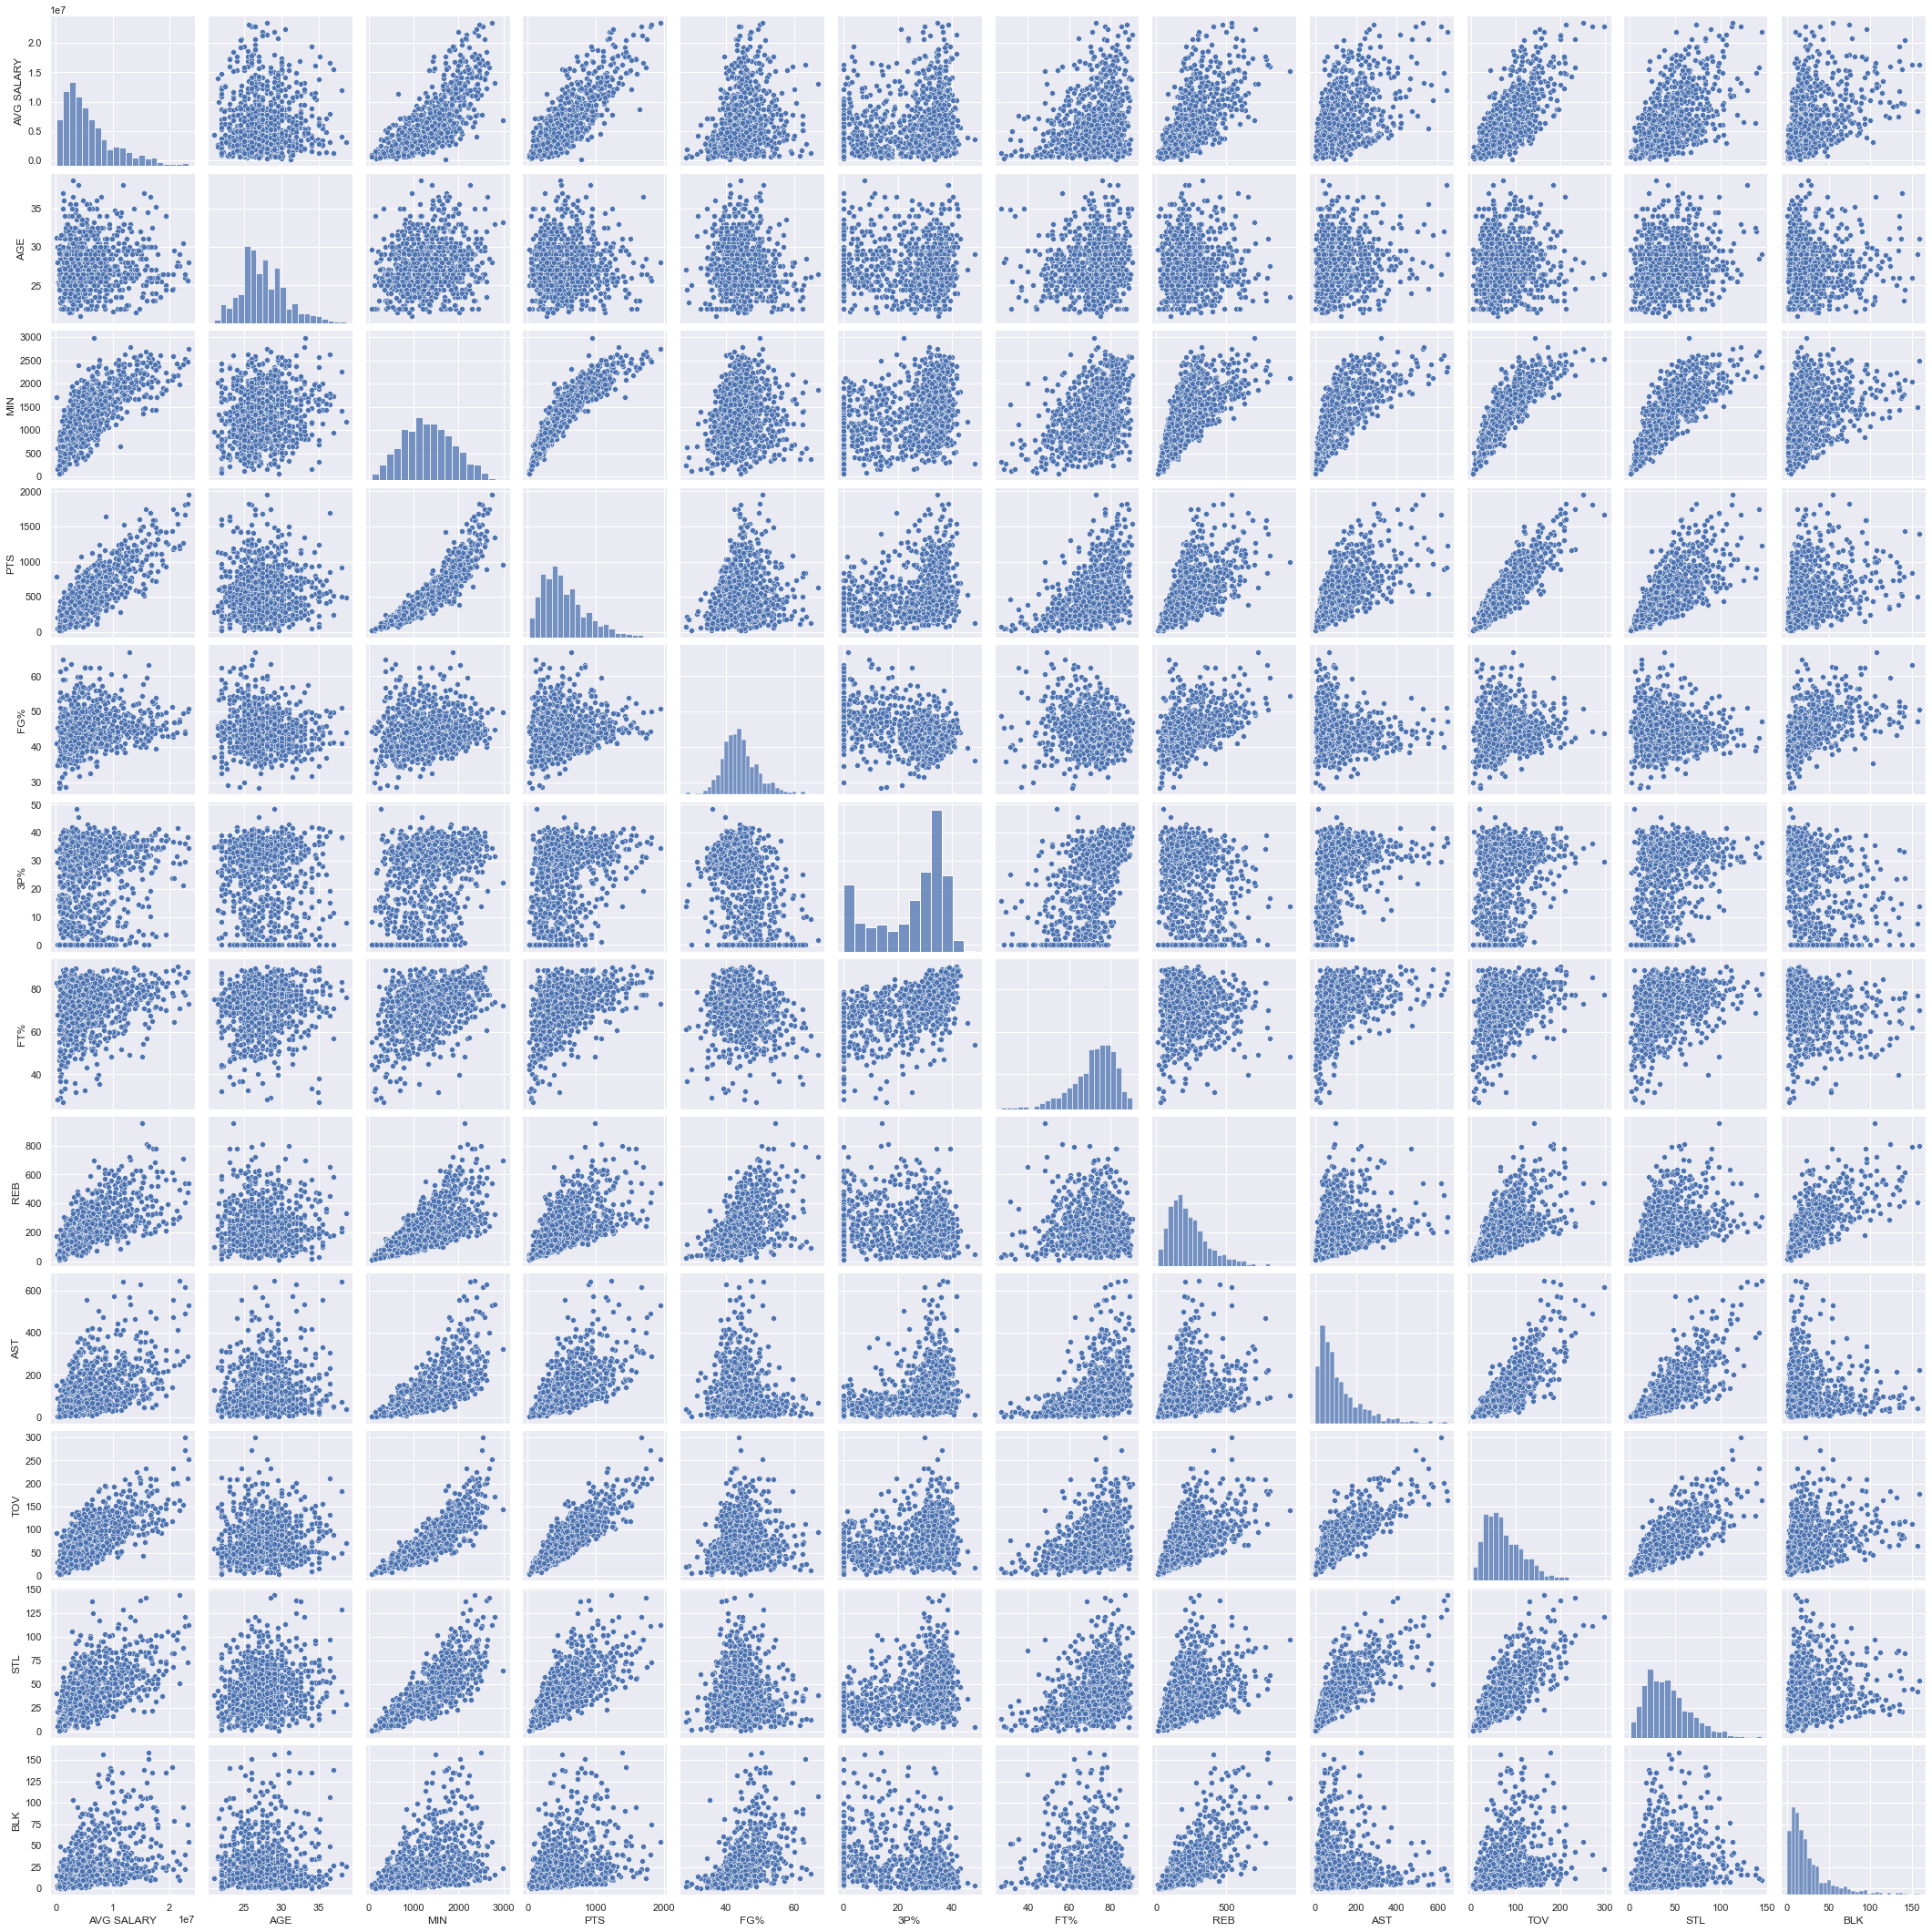

In [14]:
# View correlation among all variables using pairplot
sns.pairplot(nba2)

<AxesSubplot:>

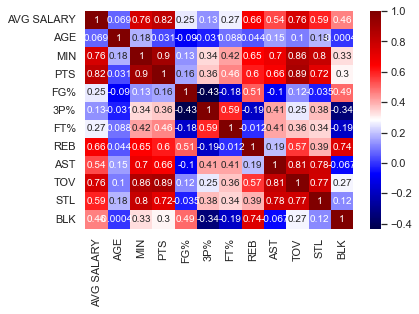

In [16]:
# View correlation among all variables using heatmap
sns.heatmap(nba2.corr(), cmap='seismic', annot=True)

In [15]:
nba2.corr()

,AVG SALARY,AGE,MIN,PTS,FG%,3P%,FT%,REB,AST,TOV,STL,BLK
AVG SALARY,1.00,0.07,0.76,0.82,0.25,0.13,0.27,0.66,0.54,0.76,0.59,0.46
AGE,0.07,1.00,0.18,0.03,-0.09,-0.03,0.09,0.04,0.15,0.10,0.18,-0.00
MIN,0.76,0.18,1.00,0.90,0.13,0.34,0.42,0.65,0.70,0.86,0.80,0.33
PTS,0.82,0.03,0.90,1.00,0.16,0.36,0.46,0.60,0.66,0.89,0.72,0.30
FG%,0.25,-0.09,0.13,0.16,1.00,-0.43,-0.18,0.51,-0.10,0.12,-0.04,0.49
3P%,0.13,-0.03,0.34,0.36,-0.43,1.00,0.59,-0.19,0.41,0.25,0.38,-0.34
FT%,0.27,0.09,0.42,0.46,-0.18,0.59,1.00,-0.01,0.41,0.36,0.34,-0.19
REB,0.66,0.04,0.65,0.60,0.51,-0.19,-0.01,1.00,0.19,0.57,0.39,0.74
AST,0.54,0.15,0.70,0.66,-0.10,0.41,0.41,0.19,1.00,0.81,0.78,-0.07
TOV,0.76,0.10,0.86,0.89,0.12,0.25,0.36,0.57,0.81,1.00,0.77,0.27


Strong correlation between average salary and average minutes played, points scored, rebounds, and turnovers.

### Assign features and target.  Partition into training and test datasets.

In [17]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV

# Target
y = nba2['AVG SALARY']
# Features
X = nba2.drop(columns='AVG SALARY')

# Partition dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Split training data into multiple folds